In [2]:
# export locations of the scripts
from export_locations import export_locations

# GTSDB

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import sys
sys.path.append("../sign_recognition/dict/") 
from sign_names_dict import sign_name_GTSRB_full_dict

In [5]:
df = pd.read_csv('/data/Images/Datasets/GTSDB/gt.csv')
df_named = df.copy()
df_named['ClassId'].replace(sign_name_GTSRB_full_dict, inplace=True)
df_named.head()  # prints top 5 rows

,Filename,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
0,00000.ppm,774,411,815,446,priority at next intersection (danger)
1,00001.ppm,983,388,1024,432,roundabout (mandatory)
2,00001.ppm,386,494,442,552,keep right (mandatory)
3,00001.ppm,973,335,1031,390,give way (other)
4,00002.ppm,892,476,1006,592,keep left (mandatory)


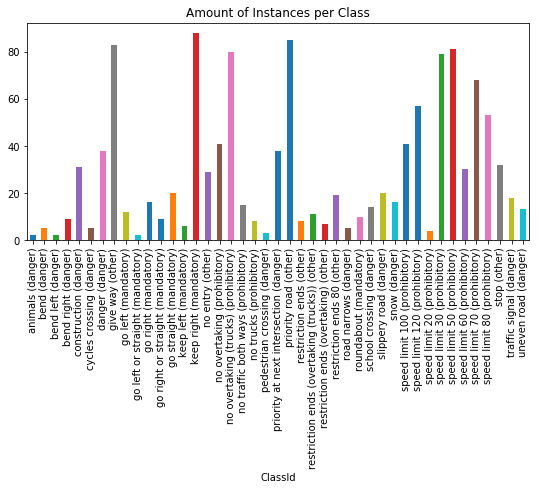

In [6]:
grouped_classes = df_named.groupby('ClassId').count()['Roi.X1']  # Group the dataframe by classes.
grouped_classes.plot(kind='bar', figsize=(9,4),  title='Amount of Instances per Class', legend=False)
plt.show()

In [7]:
df.head()

,Filename,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
0,00000.ppm,774,411,815,446,11
1,00001.ppm,983,388,1024,432,40
2,00001.ppm,386,494,442,552,38
3,00001.ppm,973,335,1031,390,13
4,00002.ppm,892,476,1006,592,39


In [8]:
from sign_names_dict import gtsrb_to_carolo
df.head()
df = df[df['ClassId'].isin(gtsrb_to_carolo)]
df.head()

,Filename,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
2,00001.ppm,386,494,442,552,38
3,00001.ppm,973,335,1031,390,13
6,00003.ppm,742,466,764,489,9
10,00005.ppm,1172,164,1284,278,9
12,00007.ppm,825,406,864,445,9


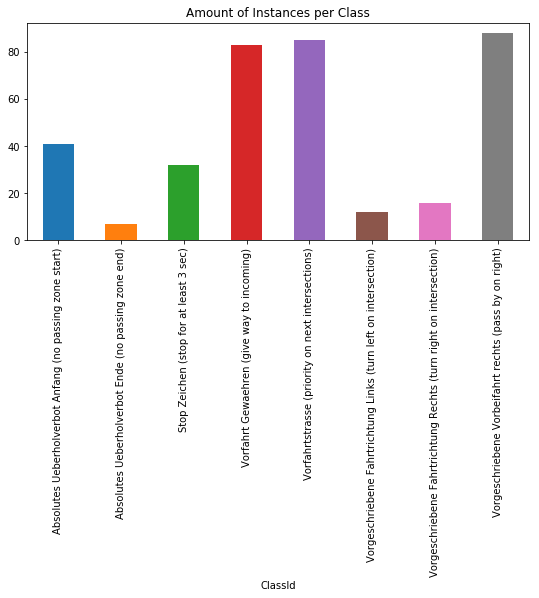

In [9]:
from sign_names_dict import sign_name_carolo_dict
df_named_cleaned = df.copy()
df_named_cleaned['ClassId'].replace(sign_name_carolo_dict, inplace=True)
grouped_classes = df_named_cleaned.groupby('ClassId').count()['Roi.X1']  # Group the dataframe by classes.
grouped_classes.plot(kind='bar', figsize=(9,4),  title='Amount of Instances per Class', legend=False)
plt.show()

In [10]:
df.to_csv(export_locations['GTSDB'], sep=',', index=False)

# LISA and LISA-TS-Extended

Only usable signs are the stop signs.

## LISA

In [11]:
df = pd.read_csv('/data/Images/Datasets/LISA/TS/LISA_filtered.csv')
df.head()  # prints top 5 rows

,Filename,Annotation tag,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y,Occluded,On another road,Origin file,Origin frame number,Origin track,Origin track frame number
0,aiua120214-0/frameAnnotations-DataLog02142012_...,stop,862,104,916,158,0,0,aiua120214-0/DataLog02142012_external_camera.avi,2667,stop_1330545910.avi,2
1,aiua120214-0/frameAnnotations-DataLog02142012_...,stop,922,88,982,148,1,0,aiua120214-0/DataLog02142012_external_camera.avi,2672,stop_1330545910.avi,7
2,aiua120214-0/frameAnnotations-DataLog02142012_...,stop,376,138,413,175,0,0,aiua120214-0/DataLog02142012_external_camera.avi,3176,stop_1330545935.avi,2
3,aiua120214-0/frameAnnotations-DataLog02142012_...,stop,709,203,726,227,0,1,aiua120214-0/DataLog02142012_external_camera.avi,3176,stop_1330545935.avi,2
4,aiua120214-0/frameAnnotations-DataLog02142012_...,stop,412,145,451,185,0,0,aiua120214-0/DataLog02142012_external_camera.avi,3181,stop_1330545935.avi,7


In [12]:
from sign_names_dict import LISA_to_carolo
carolo_df = df[['Filename', 'Upper left corner X', 'Upper left corner Y', 'Lower right corner X', 'Lower right corner Y', 'Annotation tag']].copy()
carolo_df.rename(
  columns={
    'Upper left corner X' : 'Roi.X1',
    'Upper left corner Y' : 'Roi.Y1',
    'Lower right corner X' : 'Roi.X2',
    'Lower right corner Y' : 'Roi.Y2',
    'Annotation tag' : 'ClassId'
  },
  inplace=True
)
carolo_df['ClassId'].replace(LISA_to_carolo, inplace=True)
carolo_df.to_csv(export_locations['LISA'], sep=',', index=False)
carolo_df.head()

,Filename,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
0,aiua120214-0/frameAnnotations-DataLog02142012_...,862,104,916,158,14
1,aiua120214-0/frameAnnotations-DataLog02142012_...,922,88,982,148,14
2,aiua120214-0/frameAnnotations-DataLog02142012_...,376,138,413,175,14
3,aiua120214-0/frameAnnotations-DataLog02142012_...,709,203,726,227,14
4,aiua120214-0/frameAnnotations-DataLog02142012_...,412,145,451,185,14


In [13]:
print('LISA Contains', carolo_df['ClassId'].size, 'stop signs')

LISA Contains 1821 stop signs


## LISA-Extended

Same deal, just stop signs

In [14]:
df = pd.read_csv('/data/Images/Datasets/LISA/training/allTrainingAnnotations.csv')
df.head()  # prints top 5 rows

,Filename,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
0,2014-04-24_10-59/frameAnnotations-cam1-2.avi_a...,810,436,838,468,14
1,2014-04-24_10-59/frameAnnotations-cam1-2.avi_a...,830,436,855,462,14
2,2014-04-24_10-59/frameAnnotations-cam1-2.avi_a...,861,428,896,464,14
3,2014-04-24_10-59/frameAnnotations-cam1-2.avi_a...,877,428,907,461,14
4,2014-04-24_10-59/frameAnnotations-cam1-2.avi_a...,943,418,979,457,14


In [15]:
carolo_df = df[['Filename', 'Upper left corner X', 'Upper left corner Y', 'Lower right corner X', 'Lower right corner Y', 'Annotation tag']].copy()
carolo_df.rename(
  columns={
    'Upper left corner X' : 'Roi.X1',
    'Upper left corner Y' : 'Roi.Y1',
    'Lower right corner X' : 'Roi.X2',
    'Lower right corner Y' : 'Roi.Y2',
    'Annotation tag' : 'ClassId'
  },
  inplace=True
)
carolo_df['ClassId'].replace(LISA_to_carolo, inplace=True)
carolo_df.to_csv(export_locations['LISA_EXTENDED'], sep=',', index=False)
carolo_df.head()

KeyError: "['Upper left corner X' 'Upper left corner Y' 'Lower right corner X'\n 'Lower right corner Y' 'Annotation tag'] not in index"

In [16]:
print('LISA Extended Contains', carolo_df['ClassId'].size, 'stop signs')

LISA Extended Contains 1821 stop signs


# BTSD

Contains most of our classes except for turn signals and speed zones.

## Testing set

In [17]:
df = pd.read_csv('/data/Images/Datasets/BTSDB/BelgiumTSD_annotations/BTSD_testing_GTclear.txt')

In [18]:
# remove trailing class added by comma and superclass
df = df.drop(['SuperclassId', 'Unnamed: 7'], axis=1)
df.head()

,Filename,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
0,01/image.006840.jp2,1355.27,13.64,1580.73,250.00,65
1,01/image.006841.jp2,1143.33,113.06,1279.51,252.76,65
2,01/image.006842.jp2,1064.28,143.55,1165.29,245.56,65
3,01/image.006840.jp2,1345.27,428.82,1498.91,582.45,-1
4,01/image.006841.jp2,1153.88,360.27,1243.33,457.75,-1


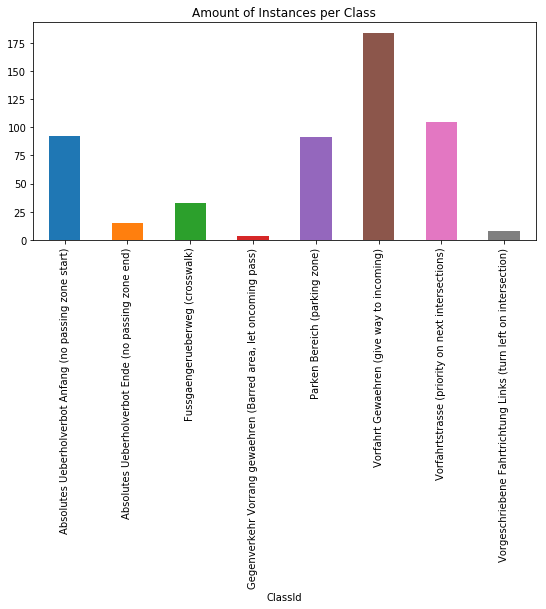

In [19]:
from sign_names_dict import BTSD_to_carolo
df = df[df['ClassId'].isin(BTSD_to_carolo)]
df['ClassId'].replace(BTSD_to_carolo, inplace=True)
df_visual = df.copy()
df_visual['ClassId'].replace(sign_name_carolo_dict, inplace=True)
grouped_classes = df_visual.groupby('ClassId').count()['Roi.X1']  # Group the dataframe by classes.
grouped_classes.plot(kind='bar', figsize=(9,4),  title='Amount of Instances per Class', legend=False)
plt.show()

In [20]:
df.to_csv(export_locations['BTSD_TESTING'], sep=',', index=False)

## Training set

In [21]:
df = pd.read_csv('/data/Images/Datasets/BTSDB/BelgiumTSD_annotations/BTSD_training_GTclear.txt')
df = df.drop(['SuperclassId', 'Unnamed: 7'], axis=1)
df.head()

,Filename,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
0,01/image.000935.jp2,1346.82,246.76,1582.12,484.41,65
1,01/image.000936.jp2,1164.88,237.94,1324.29,397.35,65
2,01/image.000937.jp2,1077.29,232.49,1196.90,352.10,65
3,05/image.000938.jp2,1346.21,387.23,1427.79,468.53,-1
4,05/image.000939.jp2,1466.10,397.68,1566.10,498.02,-1


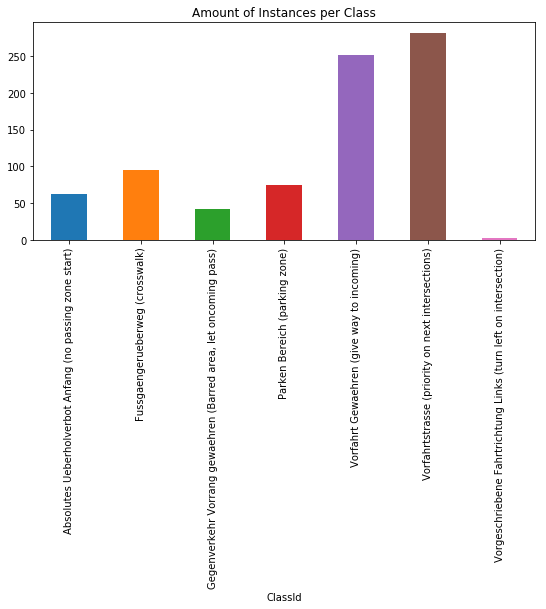

In [22]:
df = df[df['ClassId'].isin(BTSD_to_carolo)]
df['ClassId'].replace(BTSD_to_carolo, inplace=True)
df_visual = df.copy()
df_visual['ClassId'].replace(sign_name_carolo_dict, inplace=True)
grouped_classes = df_visual.groupby('ClassId').count()['Roi.X1']  # Group the dataframe by classes.
grouped_classes.plot(kind='bar', figsize=(9,4),  title='Amount of Instances per Class', legend=False)
plt.show()

In [23]:
df.to_csv(export_locations['BTSD_TRAINING'], sep=',', index=False)

# Swedish Traffic Sign Dataset (STS)

Sweden also uses yellow as base, same as US, but some more usable signs overall

In [24]:
# parse the dataset
def read_sts_annotation(filepath):
    data = []
    with open(filepath, 'r') as file:
        text = file.read() 
    lines = text.split('\n')
    for line in lines[0:-2]:
        split_line = line.split(':')
        filename = str(split_line[0]).lstrip()
        if filename == '':
            print('ERROR: file incorrect!')
            break

        if split_line[1] == '':
            continue
        else:
            split_signs = split_line[1].split(';')
            for split_sign in split_signs[0:-2]:
                sign_info = split_sign.split(',')
                
                # skip misc signs with no info
                if sign_info[0] == 'MISC_SIGNS':
                    continue
                
                sign_name = str(sign_info[-1]).lstrip()
                # tl positions are second
                x1 = float(sign_info[-4].lstrip())
                y1 = float(sign_info[-3].lstrip())
                x2 = float(sign_info[-5].lstrip())
                y2 = float(sign_info[-6].lstrip())
                data.append([filename, x1, y1, x2, y2, sign_name])
                
    df = pd.DataFrame(data, columns=['Filename','Roi.X1','Roi.Y1','Roi.X2','Roi.Y2','ClassId'])
    return df

In [25]:
df = read_sts_annotation('/data/Images/Datasets/STS/annotations_1.txt')
df.head()

,Filename,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
0,1277381674Image000001.jpg,393.149818,533.126540,573.905720,432.168746,PASS_EITHER_SIDE
1,1277381674Image000001.jpg,414.015810,566.716278,589.307319,436.049047,PASS_RIGHT_SIDE
2,1277381674Image000006.jpg,331.078253,521.460738,571.287927,377.317885,PASS_EITHER_SIDE
3,1277381674Image000006.jpg,371.812402,564.463713,591.901314,397.309971,PASS_RIGHT_SIDE
4,1277381674Image000011.jpg,220.695232,486.806716,550.546745,282.379131,PASS_EITHER_SIDE


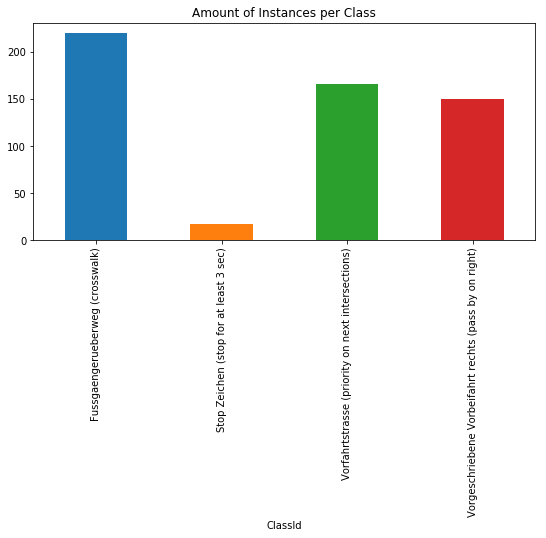

In [26]:
from sign_names_dict import STS_to_carolo
df = df[df['ClassId'].isin(STS_to_carolo)]
df['ClassId'].replace(STS_to_carolo, inplace=True)
df_visual = df.copy()
df_visual['ClassId'].replace(sign_name_carolo_dict, inplace=True)
grouped_classes = df_visual.groupby('ClassId').count()['Roi.X1']  # Group the dataframe by classes.
grouped_classes.plot(kind='bar', figsize=(9,4),  title='Amount of Instances per Class', legend=False)
plt.show()

In [27]:
df.to_csv('/data/Images/Datasets/STS/annotations_1_carolo.csv', sep=',', index=False)

In [28]:
df = read_sts_annotation('/data/Images/Datasets/STS/annotations_2.txt')
df.head()

,Filename,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
0,1277104293Image000004.jpg,365.535203,434.040636,450.226577,381.136110,70_SIGN
1,1277104293Image000009.jpg,358.813273,430.332468,447.194537,375.164370,70_SIGN
2,1277104314Image000002.jpg,309.113411,453.572999,471.539727,319.538549,STOP
3,1277104314Image000002.jpg,178.107118,454.330679,464.255913,186.929548,100_SIGN
4,1277104314Image000002.jpg,119.423500,457.815500,465.539700,126.182100,PASS_RIGHT_SIDE


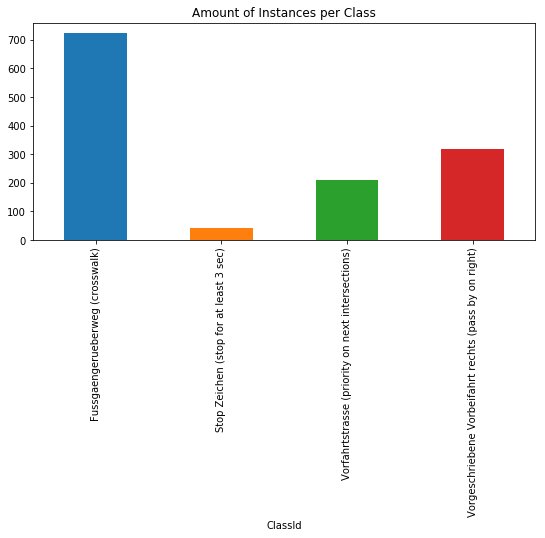

In [29]:
df = df[df['ClassId'].isin(STS_to_carolo)]
df['ClassId'].replace(STS_to_carolo, inplace=True)
df_visual = df.copy()
df_visual['ClassId'].replace(sign_name_carolo_dict, inplace=True)
grouped_classes = df_visual.groupby('ClassId').count()['Roi.X1']  # Group the dataframe by classes.
grouped_classes.plot(kind='bar', figsize=(9,4),  title='Amount of Instances per Class', legend=False)
plt.show()

In [30]:
df.to_csv(export_locations['STS'], sep=',', index=False)

# Dataset of Italian Traffic Signs (DITS)

For some reason no annotations are uploaded for the detection subset and detection subset is more like GTSRB (cropped window) even though in their paper it looks fine (and in the test data) and in the paper they promise to "improve soon".

# Russian Traffic Sign Dataset 

Merged subclass annotations into single file for each of the three dataset-parts, bash script is in the dataset root.

In [31]:
from IPython.display import display

def convert_rtsb_df(rtsb_csv_path):
    df = pd.read_csv(rtsb_csv_path)
    df.rename(
      columns={
        'x_from': 'Roi.X1',
        'y_from' : 'Roi.Y1',
        'sign_class' : 'ClassId',
        'filename': 
      },
      inplace=True
    )
    df['Roi.X2'] = df['Roi.X1'] + df['width']
    df['Roi.Y2'] = df['Roi.Y1'] + df['height']
    df = df.drop(columns=['width', 'height'])
    display(df.head())
    return df

In [37]:
def display_dataset_eval(df_in):
    df_in = df_in[df_in['ClassId'].isin(rtsd_to_carolo)]
    df_in['ClassId'].replace(rtsd_to_carolo, inplace=True)
    df_visual = df_in.copy()
    df_visual['ClassId'].replace(sign_name_carolo_dict, inplace=True)
    grouped_classes = df_visual.groupby('ClassId').count()['Roi.X1']  # Group the dataframe by classes.
    grouped_classes.plot(kind='bar', figsize=(9,4),  title='Amount of Instances per Class', legend=False)
    plt.show()
    return df_in

/data/Images/Datasets/rtsd-public/detection/rtsd-d1-gt/merged.csv


,filename,Roi.X1,Roi.Y1,ClassId,Roi.X2,Roi.Y2
0,autosave21_01_2013_12_38_13_2.jpg,403,351,1_25,424,370
1,autosave21_01_2013_12_38_13_2.jpg,798,333,1_25,820,354
2,autosave21_01_2013_12_38_20_1.jpg,376,343,1_25,404,367
3,autosave21_01_2013_12_41_10_2.jpg,834,295,1_12_2,870,331
4,autosave21_01_2013_12_46_31_2.jpg,790,340,1_17,813,363


/usr/local/lib/python3.5/dist-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


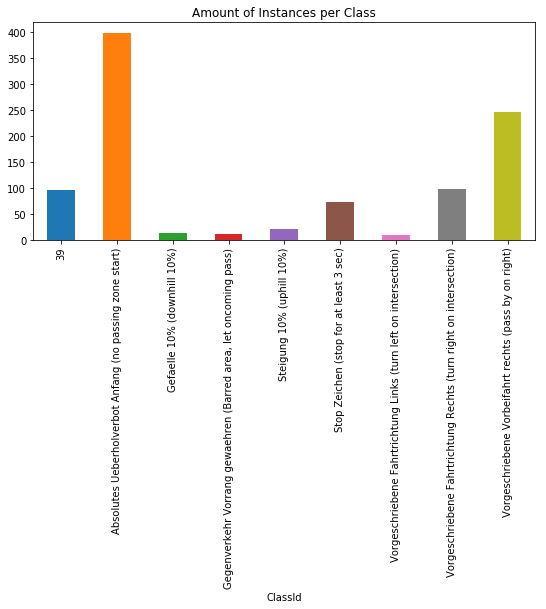

In [38]:
from sign_names_dict import rtsd_to_carolo

rtsb_merged_paths = ['/data/Images/Datasets/rtsd-public/detection/rtsd-d1-gt/merged.csv']#,
                     #'/data/Images/Datasets/rtsd-public/detection/rtsd-d2-gt/merged.csv',
                     #'/data/Images/Datasets/rtsd-public/detection/rtsd-d3-gt/merged.csv']

# since all datasets contain all labels and just the image name lists differ for each subdataset, we display only once

for rtsb_merged_path in rtsb_merged_paths:
    print(rtsb_merged_path)
    df = convert_rtsb_df(rtsb_merged_paths[0])
    df = display_dataset_eval(df)

In [39]:
df.to_csv(export_locations['RTSD'], sep=',', index=False)